# Confocal_FISH_noisy

In [1]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

#from ipywidgets import *
try:
    import cv2
except:
    !pip install cv2
    import cv2
    
#import kernels
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils

In [2]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

### Confocal_FISH

In [4]:
Args = namedtuple("args", ["clean"])
args = Args("http://www.hpca.ual.es/~vruiz/images/FDM/Confocal_FISH.png")

In [5]:
X = skimage_io.imread(args.clean)

### Confocal_FISH noisy

In [6]:
try:
    std_devs = np.load("Confocal_FISH_GF_std_devs.npy")
except FileNotFoundError:
    %run Confocal_FISH_GF_estimation.ipynb
    std_devs = np.load("Confocal_FISH_GF_std_devs.npy")
std_devs = std_devs.tolist()
std_devs

[0, 40, 80, 120, 160]

In [7]:
std_dev = std_devs[len(std_devs)//2]
std_dev

80

In [8]:
gamma = 0.15
poisson_ratio = 0.5
Y = utils.generate_MPGN(X, std_dev=std_dev, gamma=gamma, poisson_ratio=poisson_ratio).reshape(X.shape)
PCC_Y = np.corrcoef(Y.flatten(), X.flatten())[0, 1]

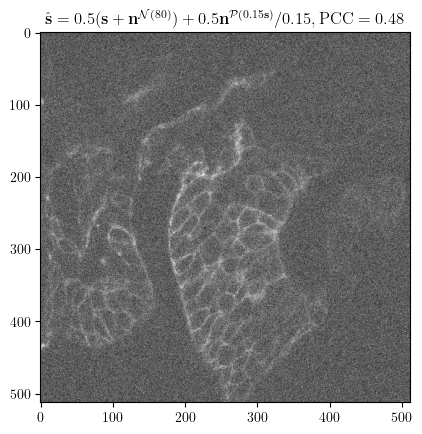

In [9]:
normal = rf"$\hat{{\mathbf{{s}}}}=0.5(\mathbf{{s}} + \mathbf{{n}}^{{\mathcal{{N}}({std_dev})}})"
poisson = rf"0.5\mathbf{{n}}^{{\mathcal{{P}}({gamma}\mathbf{{s}})}}/{gamma}, \text{{PCC}}={PCC_Y:.2f}$"
plt.title(normal + "+" + poisson) 
utils.imshow(utils.normalize(Y))
plt.savefig('Confocal_FISH_noisy.pdf', bbox_inches='tight')

In [10]:
cv2.imwrite("Confocal_FISH_noisy.png", Y)

True

In [11]:
Y.shape

(512, 512)